In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
import warnings
from termcolor import colored

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


print(colored('\nAll libraries imported succesfully.', 'red'))


All libraries imported succesfully.


In [2]:
data = pd.read_csv('../data/bank-data_xuly.csv')
data.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,0,3,17546.0,1,1,1,1,1,1,0
1,ID12102,40,1,2,30085.1,0,3,0,1,0,0,1
2,ID12103,51,0,3,16575.4,0,0,0,0,0,1,1
3,ID12104,23,0,2,20375.4,0,3,1,1,0,1,1
4,ID12105,57,0,0,50576.3,0,0,1,0,1,1,1


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          600 non-null    int64  
 2   sex          600 non-null    int64  
 3   region       600 non-null    int64  
 4   income       600 non-null    float64
 5   married      600 non-null    int64  
 6   children     600 non-null    int64  
 7   car          600 non-null    int64  
 8   save_act     600 non-null    int64  
 9   current_act  600 non-null    int64  
 10  mortgage     600 non-null    int64  
 11  pep          600 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 56.4+ KB


In [4]:
data.describe()


,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,42.395000,0.500000,2.025000,27524.031217,0.340000,1.011667,0.506667,0.310000,0.241667,0.651667,0.543333
std,14.424947,0.500417,1.092259,12899.468246,0.474104,1.056752,0.500373,0.462879,0.428451,0.476840,0.498534
min,18.000000,0.000000,0.000000,5014.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,17264.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,0.500000,2.000000,24925.300000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,55.250000,1.000000,3.000000,36172.675000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,67.000000,1.000000,3.000000,63130.100000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#check if data extant
data.isna().sum()

id             0
age            0
sex            0
region         0
income         0
married        0
children       0
car            0
save_act       0
current_act    0
mortgage       0
pep            0
dtype: int64

In [6]:
# Create a list of DataFrame columns
columns = list(data.columns)

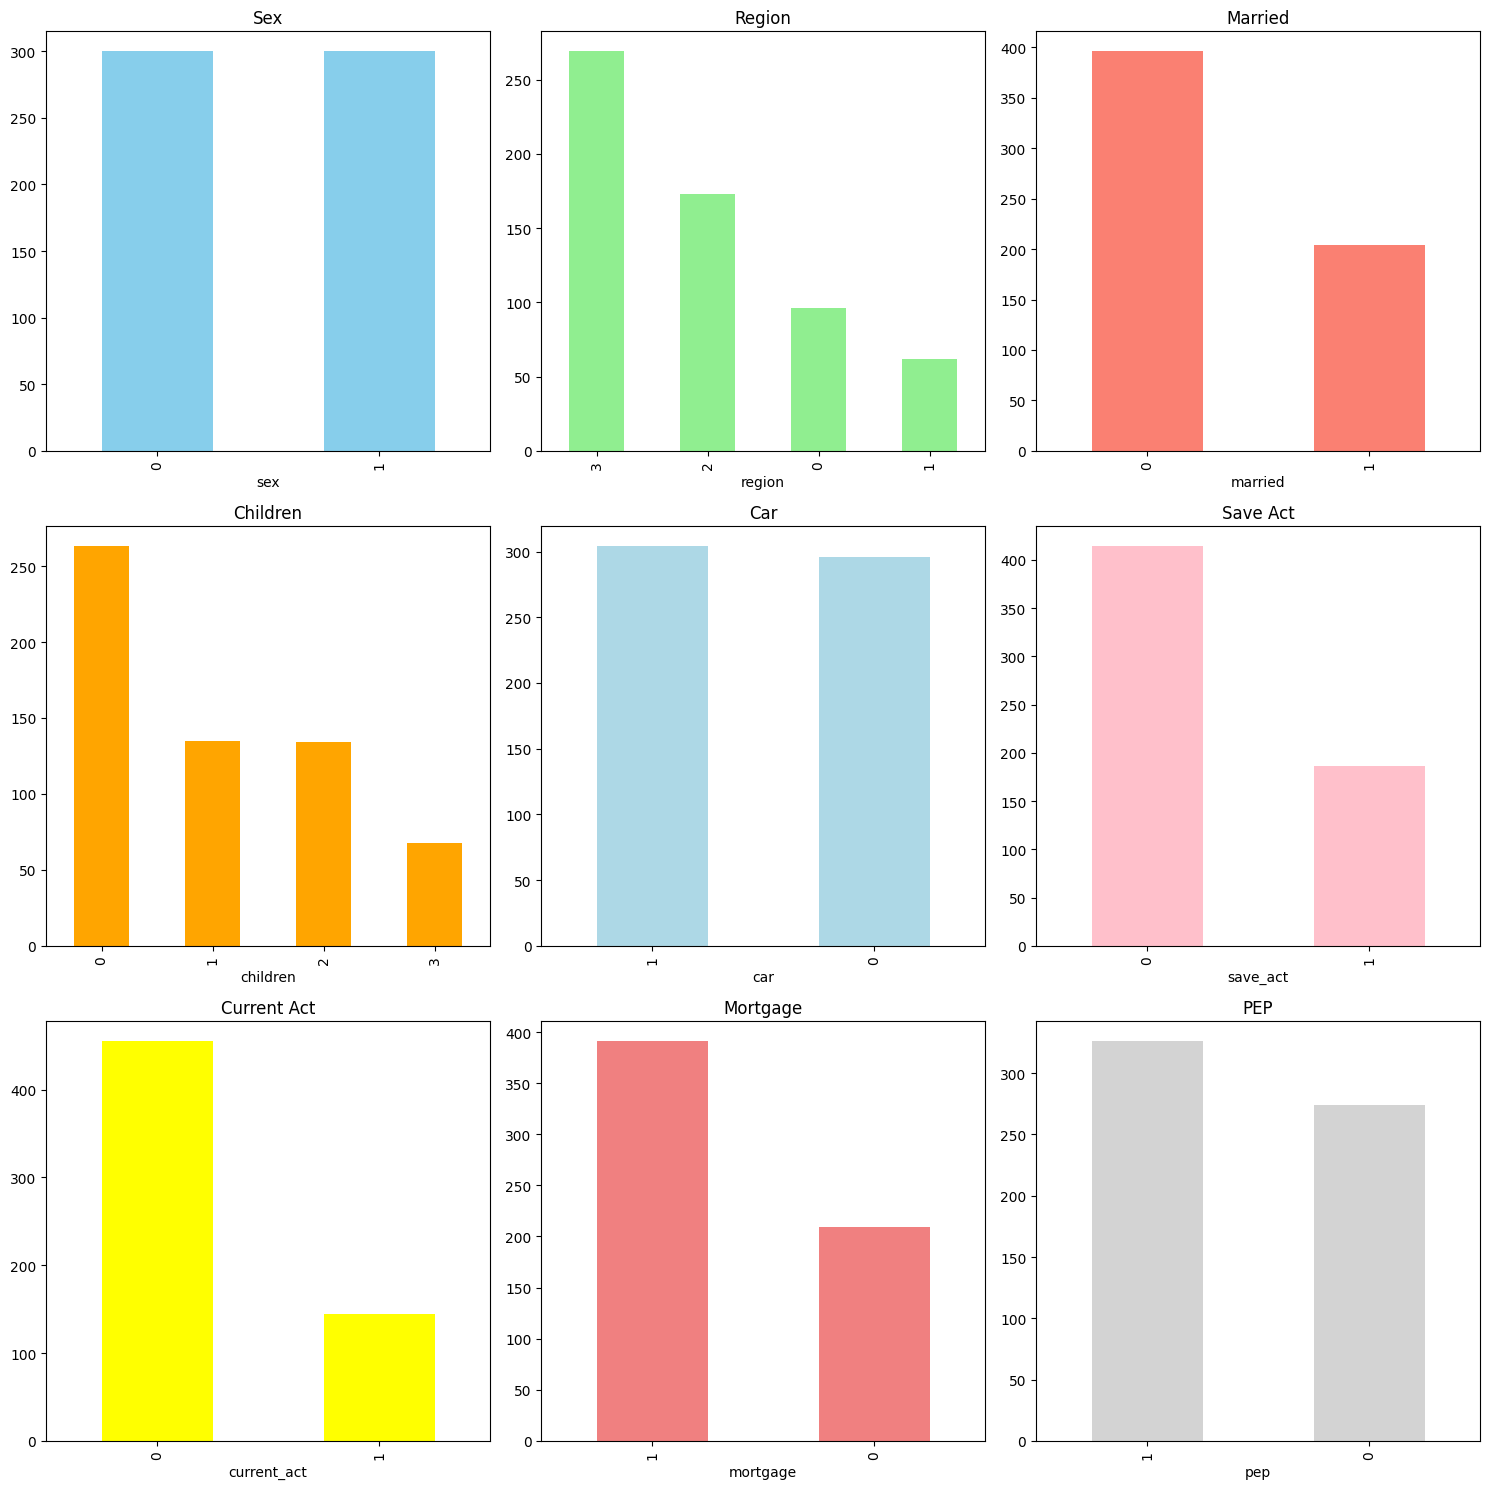

In [7]:
# Count the occurrences of each category in a specific column
sex_counts = data['sex'].value_counts()
region_counts = data['region'].value_counts()
married_counts = data['married'].value_counts()
children_counts = data['children'].value_counts()
car_counts = data['car'].value_counts()
save_act_counts = data['save_act'].value_counts()
current_act_counts = data['current_act'].value_counts()
mortgage_counts = data['mortgage'].value_counts()
pep_counts = data['pep'].value_counts()

# Create subplots for each bar chart
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Plot bar charts
sex_counts.plot(kind='bar', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Sex')

region_counts.plot(kind='bar', ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Region')

married_counts.plot(kind='bar', ax=axs[0, 2], color='salmon')
axs[0, 2].set_title('Married')

children_counts.plot(kind='bar', ax=axs[1, 0], color='orange')
axs[1, 0].set_title('Children')

car_counts.plot(kind='bar', ax=axs[1, 1], color='lightblue')
axs[1, 1].set_title('Car')

save_act_counts.plot(kind='bar', ax=axs[1, 2], color='pink')
axs[1, 2].set_title('Save Act')

current_act_counts.plot(kind='bar', ax=axs[2, 0], color='yellow')
axs[2, 0].set_title('Current Act')

mortgage_counts.plot(kind='bar', ax=axs[2, 1], color='lightcoral')
axs[2, 1].set_title('Mortgage')

pep_counts.plot(kind='bar', ax=axs[2, 2], color='lightgray')
axs[2, 2].set_title('PEP')

plt.tight_layout()
plt.show()

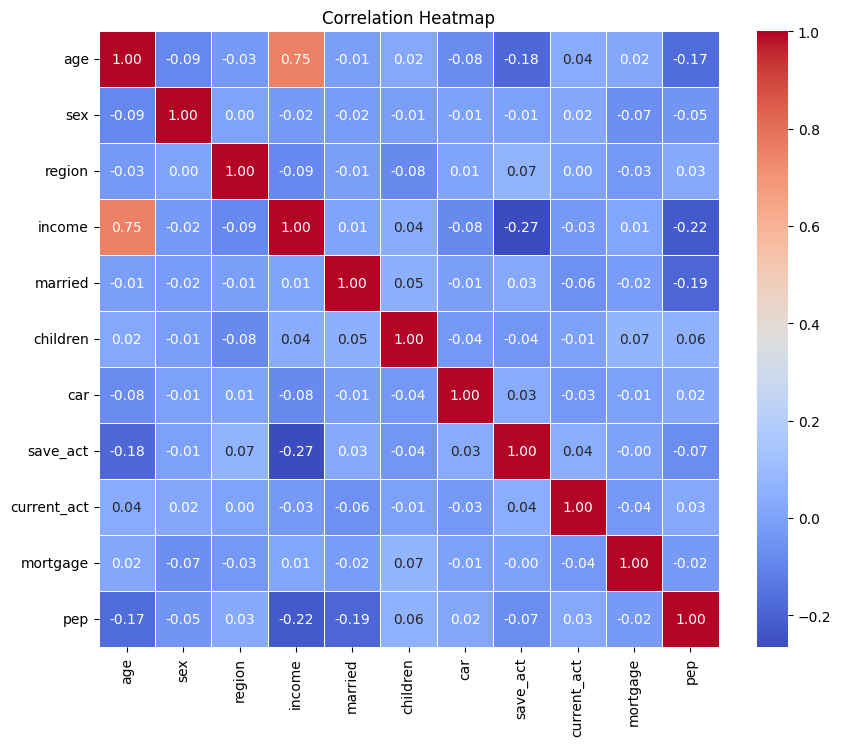

In [8]:
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# Define features (X) and target variable (y)
X = data.drop(columns=['pep'])  # Features
y = data['pep']  # Target variable

# Split the data into training and testing sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (480, 11) (480,)
Testing data shape: (120, 11) (120,)


In [10]:
# Select numerical columns for normalization
numeric_columns = ['age', 'income']

# Apply Min-Max scaling to the selected numerical columns
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Print the first few rows of the transformed data
print(data.head())

        id       age  sex  region    income  married  children  car  save_act  \
0  ID12101  0.612245    0       3  0.215634        1         1    1         1   
1  ID12102  0.448980    1       2  0.431395        0         3    0         1   
2  ID12103  0.673469    0       3  0.198933        0         0    0         0   
3  ID12104  0.102041    0       2  0.264320        0         3    1         1   
4  ID12105  0.795918    0       0  0.783987        0         0    1         0   

   current_act  mortgage  pep  
0            1         1    0  
1            0         0    1  
2            0         1    1  
3            0         1    1  
4            1         1    1  


In [11]:
# Split the data into training and testing sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select numerical columns for normalization
numeric_columns = ['age', 'income']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler on training data and transform training data
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

# Transform test data using the same scaler
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Print the first few rows of normalized training data
print("Normalized Training Data:")
print(X_train.head())

# Print the first few rows of normalized test data
print("\nNormalized Test Data:")
print(X_test.head())

Normalized Training Data:
          id       age  sex  region    income  married  children  car  \
145  ID12246  0.816327    1       1  0.794791        0         0    1   
9    ID12110  0.734694    1       2  0.330338        0         2    0   
375  ID12476  0.469388    1       3  0.272767        0         0    0   
523  ID12624  0.326531    0       2  0.194040        0         0    0   
188  ID12289  0.408163    1       3  0.513675        0         2    0   

     save_act  current_act  mortgage  
145         0            1         0  
9           0            0         1  
375         0            0         1  
523         0            1         0  
188         1            0         0  

Normalized Test Data:
          id       age  sex  region    income  married  children  car  \
110  ID12211  0.367347    1       2  0.556066        1         2    1   
419  ID12520  0.795918    1       2  0.285608        0         0    1   
565  ID12666  0.244898    1       2  0.341617        0     

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables if needed
encoder = LabelEncoder()
X_train_encoded = X_train.copy()
for col in X_train_encoded.columns:
    if X_train_encoded[col].dtype == 'object':
        X_train_encoded[col] = encoder.fit_transform(X_train_encoded[col])

# Define the kNN model with a specified number of neighbors (e.g., k=3)
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the kNN model on the training data
knn_model.fit(X_train_encoded, y_train)

# Optionally, you can make predictions on the training data to evaluate the model performance
train_predictions = knn_model.predict(X_train_encoded)

# Print the accuracy of the model on the training data
train_accuracy = knn_model.score(X_train_encoded, y_train)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.7833333333333333
